In [13]:
!pip install tensorflow matplotlib

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
import matplotlib.pyplot as plt

In [17]:
import random

In [18]:
import numpy as np

In [ ]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import keras

In [19]:

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shapes of dataset arrays
for i, name in zip((x_train, y_train, x_test, y_test), ('x_train', 'y_train', 'x_test', 'y_test')):
    print(f"{name} shape:", i.shape)

# List files in dataset folder
dataset_folder = r'C:\Users\Asus\Desktop\DL\DL_Pracs\cifar-10-img'
print("\nFiles in dataset folder:", os.listdir(dataset_folder))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)

Files in dataset folder: []


[6]


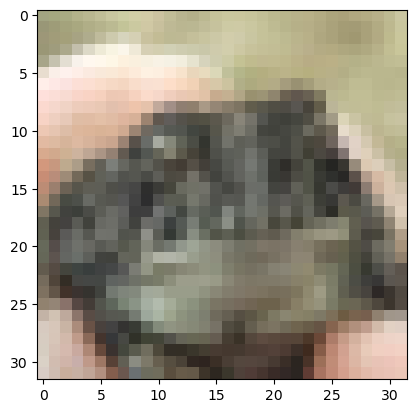

In [20]:
plt.imshow(x_train[25])
print(y_train[25])
plt.show()

In [21]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [22]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [23]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [24]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [25]:

print(y_train.shape, y_test.shape)


(50000, 10) (10000, 10)


In [26]:
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Define the input layer
model.add(keras.layers.Input(shape=(32, 32, 3)))

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.1849 - loss: 2.1787 - val_accuracy: 0.3249 - val_loss: 1.8577
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.3796 - loss: 1.7241 - val_accuracy: 0.3465 - val_loss: 1.8457
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.4637 - loss: 1.4928 - val_accuracy: 0.4944 - val_loss: 1.4074
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5138 - loss: 1.3624 - val_accuracy: 0.5330 - val_loss: 1.3043
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5496 - loss: 1.2694 - val_accuracy: 0.5727 - val_loss: 1.2069
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5839 - loss: 1.1840 - val_accuracy: 0.5691 - val_loss: 1.2209
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6015 - loss: 1.1318 - val_accuracy: 0.5940 - val_loss: 1.1542
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6257 -

In [28]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [29]:
import seaborn as sns


In [30]:
!pip install seaborn


<Axes: >

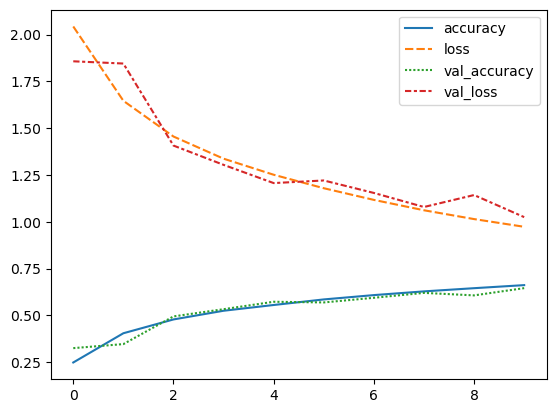

In [31]:
sns.lineplot(model.history.history)

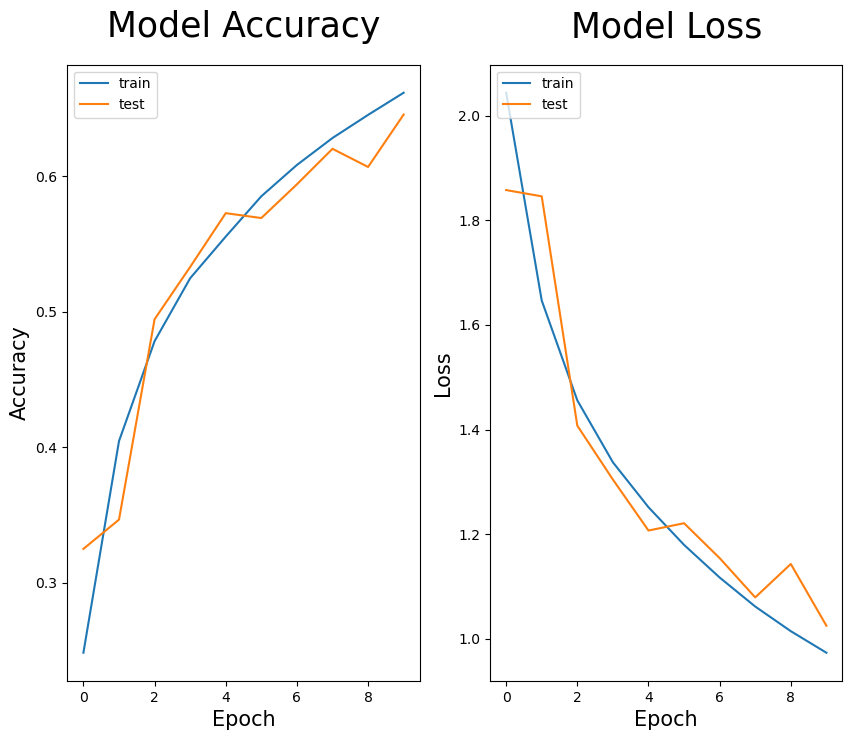

In [32]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [34]:

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

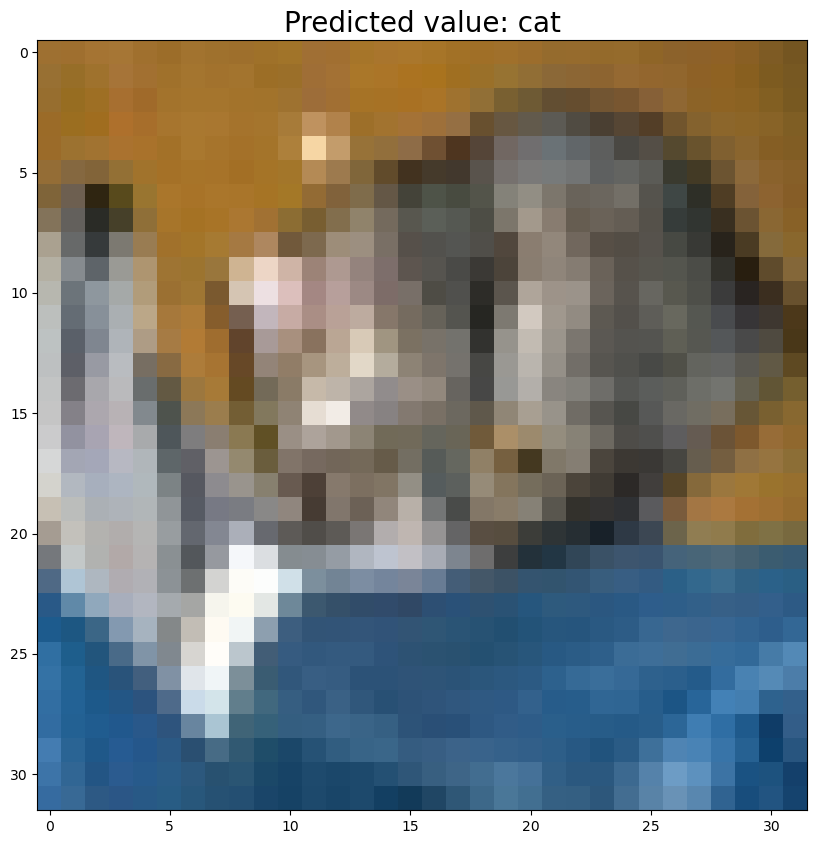

In [35]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)
plt.grid(False)

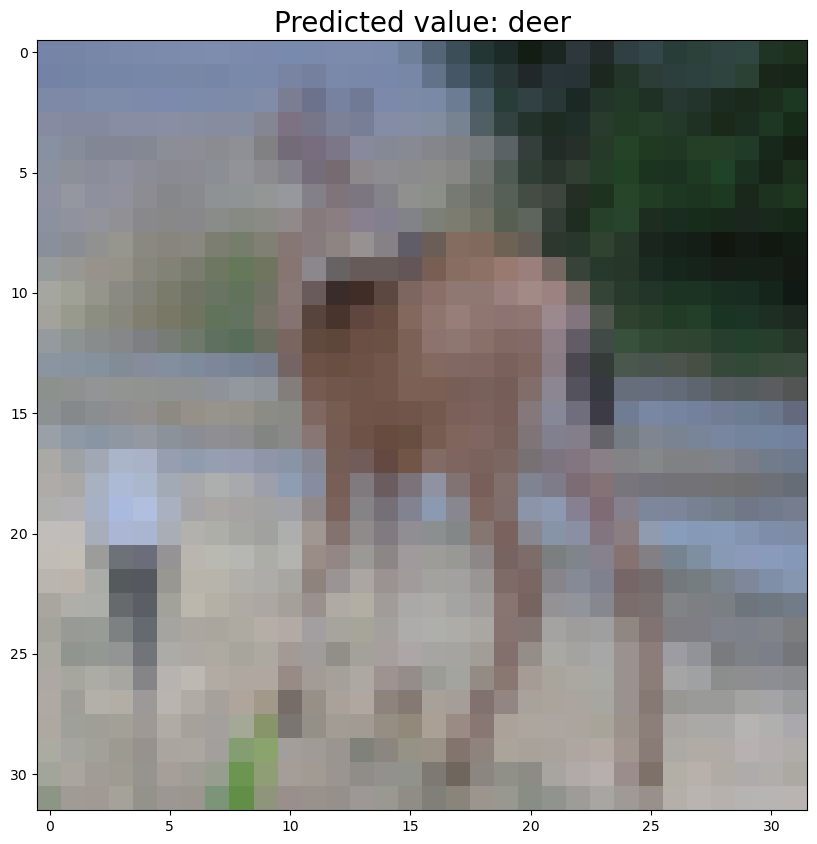

In [36]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[100].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[100], axis=0)]), size=20)
plt.grid(False)
     